In [1]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import psycopg2 # needed to get database exception errors when uploading dataframe
import requests # package for getting data from the web
from zipfile import * # package for unzipping zip files

In [2]:
# Import get_engine function from sql_functions.py and set it to a variable called engine
from sql_functions import get_engine 
engine = get_engine()
# Import psycopg2
import psycopg2

In [3]:
# Import the Information about the schema & table name
schema = 'capstone_wildfire' 
table_name = 'combined_weather_data_v4' 

In [5]:
# Verbindung zur Datenbank herstellen
engine = get_engine()

# SQL-Abfrage, um Daten aus der Tabelle zu laden
sql_query = "SELECT * FROM capstone_wildfire.combined_weather_data_v4"

# Daten aus der Datenbank abrufen und in ein DataFrame laden
df = pd.read_sql_query(sql_query, engine)

# DataFrame anzeigen
print(df)


             date  average_temp_c  minimum_temp_c  maximum_temp_c  \
0      2005-02-15             NaN             NaN             NaN   
1      2005-02-16             NaN             NaN             NaN   
2      2011-04-03            26.1            21.1            30.6   
3      2011-04-17             NaN             NaN             NaN   
4      2011-04-04            23.1            17.8            28.9   
...           ...             ...             ...             ...   
550409 2011-10-06             NaN             NaN             NaN   
550410 2011-10-07             NaN             NaN             NaN   
550411 2005-02-14             NaN             NaN             NaN   
550412 2011-10-08             NaN             NaN             NaN   
550413 2011-10-09             NaN             NaN             NaN   

        precipitation_mm  snow_mm  wind_direction_deg  windspeed_kmh  \
0                    NaN      NaN                 NaN            NaN   
1                    NaN   

In [6]:
df.head()

,date,average_temp_c,minimum_temp_c,maximum_temp_c,precipitation_mm,snow_mm,wind_direction_deg,windspeed_kmh,peak_wind_gust_kmh,air_pressure_hpa,sunshine_min,station_id,weather_station_name,states,latitude,longitude
0,2005-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KMIB0,Minot / Minot Air Force Base,North Dakota,48.4158,-101.358
1,2005-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KMIB0,Minot / Minot Air Force Base,North Dakota,48.4158,-101.358
2,2011-04-03,26.1,21.1,30.6,0.0,NaN,NaN,15.8,NaN,1007.5,NaN,72278,Phoenix Sky Harbor Airport,Arizona,33.4333,-112.050
3,2011-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KRDM0,Redmond,Oregon,44.2541,-121.150
4,2011-04-04,23.1,17.8,28.9,0.0,NaN,NaN,10.8,NaN,NaN,NaN,72278,Phoenix Sky Harbor Airport,Arizona,33.4333,-112.050


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550414 entries, 0 to 550413
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   date                  550414 non-null  datetime64[ns]
 1   average_temp_c        474579 non-null  float64       
 2   minimum_temp_c        502236 non-null  float64       
 3   maximum_temp_c        502559 non-null  float64       
 4   precipitation_mm      442960 non-null  float64       
 5   snow_mm               322056 non-null  float64       
 6   wind_direction_deg    116759 non-null  float64       
 7   windspeed_kmh         479660 non-null  float64       
 8   peak_wind_gust_kmh    19844 non-null   float64       
 9   air_pressure_hpa      412136 non-null  float64       
 10  sunshine_min          96941 non-null   float64       
 11  station_id            550414 non-null  object        
 12  weather_station_name  550414 non-null  object        
 13 

In [10]:
# extract year, month, dayofweek information out of column date and build new column for each
df["year"]=df["date"].dt.year
df["month"]=df["date"].dt.month
df["weekday"]=df["date"].dt.dayofweek

In [11]:
df.head()

,date,average_temp_c,minimum_temp_c,maximum_temp_c,precipitation_mm,snow_mm,wind_direction_deg,windspeed_kmh,peak_wind_gust_kmh,air_pressure_hpa,sunshine_min,station_id,weather_station_name,states,latitude,longitude,year,month,weekday
0,2005-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KMIB0,Minot / Minot Air Force Base,North Dakota,48.4158,-101.358,2005,2,1
1,2005-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KMIB0,Minot / Minot Air Force Base,North Dakota,48.4158,-101.358,2005,2,2
2,2011-04-03,26.1,21.1,30.6,0.0,NaN,NaN,15.8,NaN,1007.5,NaN,72278,Phoenix Sky Harbor Airport,Arizona,33.4333,-112.050,2011,4,6
3,2011-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KRDM0,Redmond,Oregon,44.2541,-121.150,2011,4,6
4,2011-04-04,23.1,17.8,28.9,0.0,NaN,NaN,10.8,NaN,NaN,NaN,72278,Phoenix Sky Harbor Airport,Arizona,33.4333,-112.050,2011,4,0


In [12]:
#Check Null Values
df.isnull().sum()

date                         0
average_temp_c           75835
minimum_temp_c           48178
maximum_temp_c           47855
precipitation_mm        107454
snow_mm                 228358
wind_direction_deg      433655
windspeed_kmh            70754
peak_wind_gust_kmh      530570
air_pressure_hpa        138278
sunshine_min            453473
station_id                   0
weather_station_name         0
states                       0
latitude                     0
longitude                    0
year                         0
month                        0
weekday                      0
dtype: int64

In den Zeilen snow, wind direction, wind gust und sunshine haben wir viele Nullwerte 

In [13]:
#Describe Stat 
df[["average_temp_c", "minimum_temp_c", "maximum_temp_c", "precipitation_mm", "snow_mm", "wind_direction_deg", "windspeed_kmh", "peak_wind_gust_kmh", "air_pressure_hpa", "sunshine_min"]].describe()

,average_temp_c,minimum_temp_c,maximum_temp_c,precipitation_mm,snow_mm,wind_direction_deg,windspeed_kmh,peak_wind_gust_kmh,air_pressure_hpa,sunshine_min
count,474579.000000,502236.000000,502559.000000,442960.000000,322056.000000,116759.000000,479660.000000,19844.000000,412136.000000,96941.000000
mean,12.728731,7.025602,18.119532,2.126059,18.626289,190.809128,12.329551,36.244018,1016.121283,266.303422
std,11.302696,11.246624,12.220801,7.466242,75.620147,97.190306,6.430453,16.364906,7.252091,306.748381
min,-49.300000,-52.000000,-48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,951.000000,0.000000
25%,5.600000,0.000000,10.600000,0.000000,0.000000,120.000000,7.900000,25.900000,1012.000000,0.000000
50%,13.900000,8.000000,19.400000,0.000000,0.000000,198.000000,11.200000,33.500000,1016.000000,49.000000
75%,21.500000,15.600000,27.800000,0.300000,0.000000,270.000000,15.500000,42.500000,1020.400000,571.000000
max,41.100000,35.600000,49.400000,339.900000,1118.000000,360.000000,201.200000,226.800000,1065.300000,1402.000000


Dive into the Weather Data 

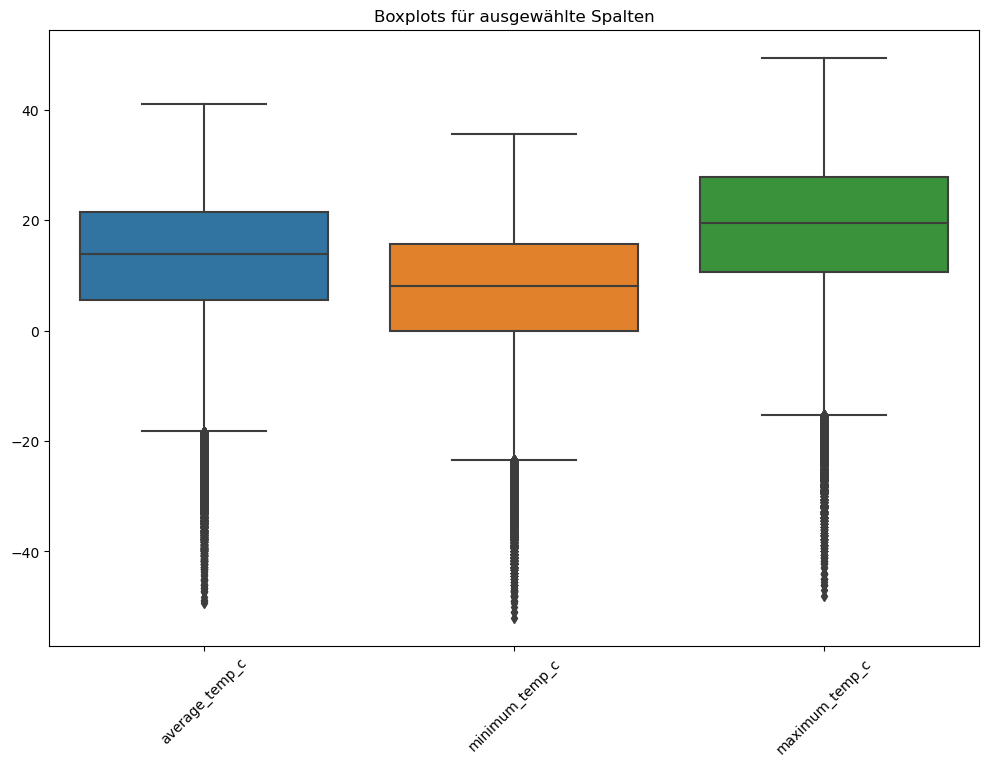

In [60]:
# Erstellung eines Subsets mit den gewünschten Columns
subset = df[["average_temp_c", "minimum_temp_c", "maximum_temp_c"]]
# Boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=subset)
plt.xticks(rotation=45)  
plt.title("Boxplots für ausgewählte Spalten")
plt.show()


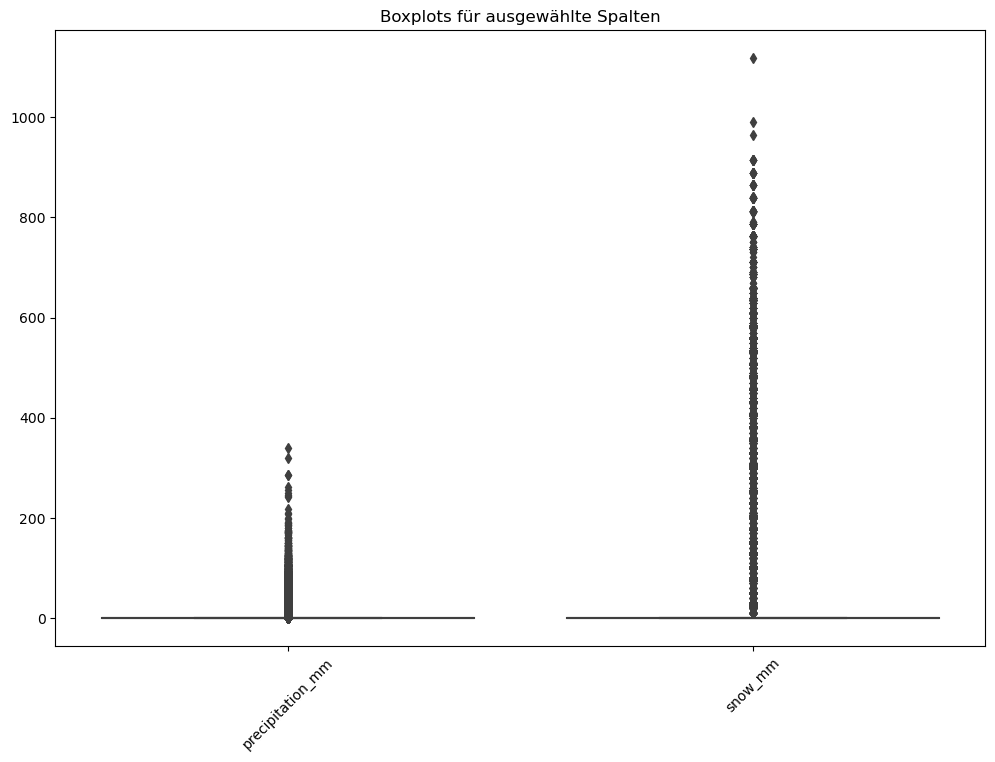

In [15]:
# Erstellung eines Subsets mit den gewünschten Columns
subset = df[["precipitation_mm", "snow_mm"]]
# Boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=subset)
plt.xticks(rotation=45)  
plt.title("Boxplots für ausgewählte Spalten")
plt.show()


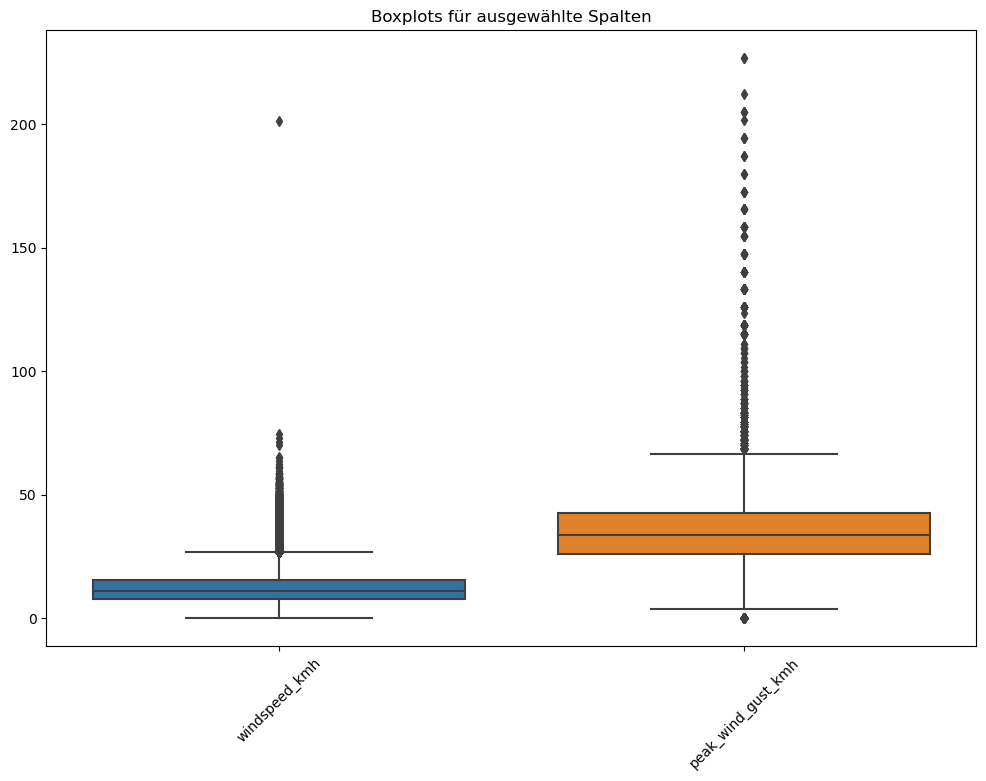

In [16]:
# Erstellung eines Subsets mit den gewünschten Columns
subset = df[["windspeed_kmh", "peak_wind_gust_kmh"]]
# Boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=subset)
plt.xticks(rotation=45)  
plt.title("Boxplots für ausgewählte Spalten")
plt.show()


What is the difference between a wind gust and average or sustained wind? 

Average or mean wind speed = the wind speed averaged over a 10-minute period. 
Wind gusts = sudden increases in wind for a short duration, typically a few seconds. 
As a rule of thumb, wind gusts are usually about 40 percent stronger than the average wind speed over open water.  

In [61]:
# Den höchsten windspeed mit 201 kmh wurde in San Fransico gemessen. 
# Da war aber nichts ungewöhnliches zu diesem Zeitpunkt 2003 (Google) deshalb löschen
df["windspeed_kmh"].nlargest(10)

307856    201.2
52936      74.5
365289     73.1
52797      71.3
53218      70.2
425929     65.2
366069     64.8
365622     63.7
52176      62.3
51708      61.6
Name: windspeed_kmh, dtype: float64

In [67]:
#Bilde df2 um windspeed peak zu entfernen
df2 = df[(df["windspeed_kmh"] <= 190) | (pd.isna(df["windspeed_kmh"]))]
df2["windspeed_kmh"].nlargest(10)

52936     74.5
365289    73.1
52797     71.3
53218     70.2
425929    65.2
366069    64.8
365622    63.7
52176     62.3
51708     61.6
53219     61.2
Name: windspeed_kmh, dtype: float64

In [68]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550413 entries, 0 to 550413
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   date                  550413 non-null  datetime64[ns]
 1   average_temp_c        474578 non-null  float64       
 2   minimum_temp_c        502235 non-null  float64       
 3   maximum_temp_c        502558 non-null  float64       
 4   precipitation_mm      442959 non-null  float64       
 5   snow_mm               322056 non-null  float64       
 6   wind_direction_deg    116759 non-null  float64       
 7   windspeed_kmh         479659 non-null  float64       
 8   peak_wind_gust_kmh    19844 non-null   float64       
 9   air_pressure_hpa      412135 non-null  float64       
 10  sunshine_min          96940 non-null   float64       
 11  station_id            550413 non-null  object        
 12  weather_station_name  550413 non-null  object        
 13 

In [22]:
# Rapid City mit 75kmh nun top windspeed
windspeed = df2[df2["windspeed_kmh"] == df2["windspeed_kmh"].max()]
windspeed 

,date,average_temp_c,minimum_temp_c,maximum_temp_c,precipitation_mm,snow_mm,wind_direction_deg,windspeed_kmh,peak_wind_gust_kmh,air_pressure_hpa,sunshine_min,station_id,weather_station_name,states,latitude,longitude,year,month,weekday
52936,2009-03-23,0.0,-5.6,8.9,19.8,0.0,NaN,74.5,NaN,NaN,NaN,72662,Rapid City Regional Airport,South Dakota,44.05,-103.05,2009,3,0


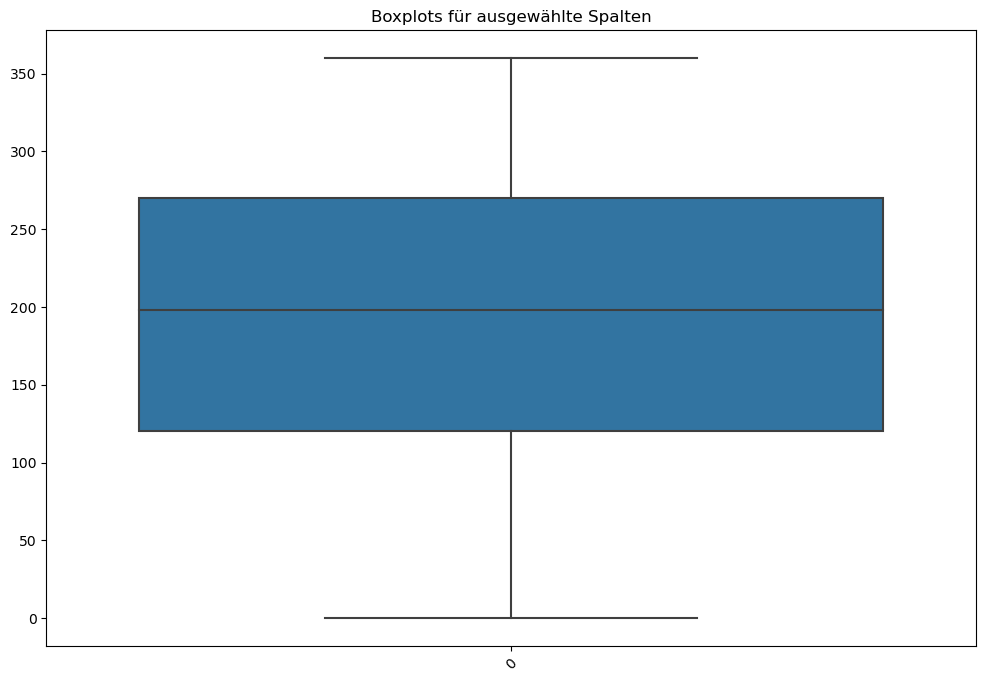

In [23]:
# Erstellung eines Subsets mit den gewünschten Columns
subset = df2["wind_direction_deg"]
# Boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=subset)
plt.xticks(rotation=45)  
plt.title("Boxplots für ausgewählte Spalten")
plt.show()


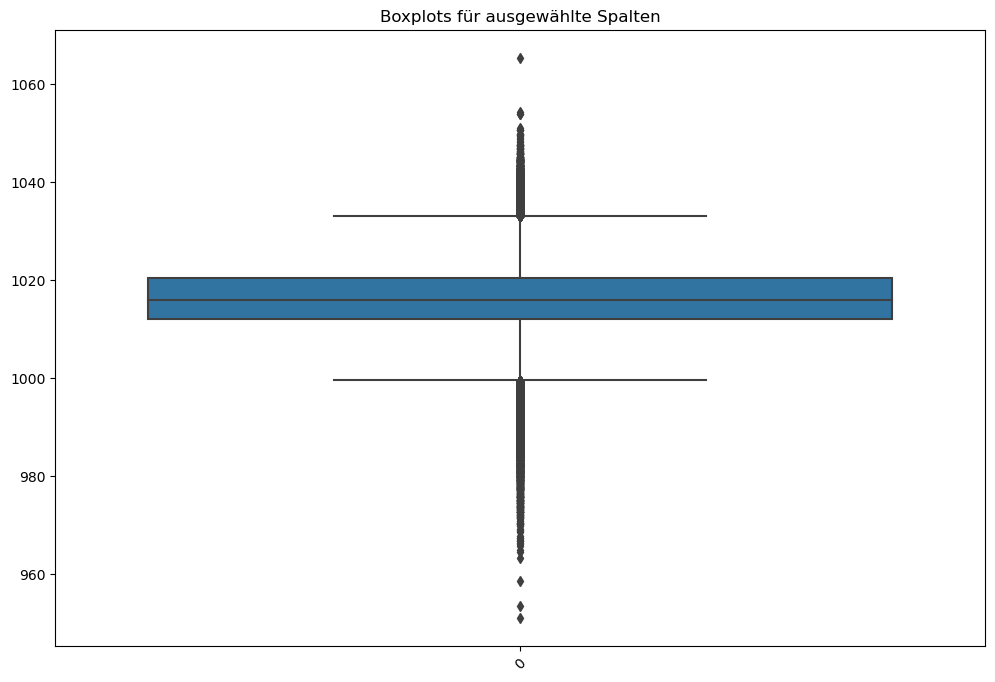

In [24]:
# Erstellung eines Subsets mit den gewünschten Columns
subset = df2["air_pressure_hpa"]
# Erstelle Boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=subset)
plt.xticks(rotation=45) 
plt.title("Boxplots für ausgewählte Spalten")
plt.show()


In [25]:
df2["air_pressure_hpa"].nlargest(10)

440667    1065.3
113377    1054.4
119831    1053.9
113378    1053.8
433006    1051.1
107480    1050.7
110068    1050.6
118686    1050.6
42133     1049.9
431825    1049.9
Name: air_pressure_hpa, dtype: float64

In [26]:
air_pressure = df2.sort_values(by="air_pressure_hpa", ascending=False).head()
air_pressure

# Höchster Wert in Alaska gemessen

,date,average_temp_c,minimum_temp_c,maximum_temp_c,precipitation_mm,snow_mm,wind_direction_deg,windspeed_kmh,peak_wind_gust_kmh,air_pressure_hpa,sunshine_min,station_id,weather_station_name,states,latitude,longitude,year,month,weekday
440667,1996-02-05,-10.8,-12.8,-8.3,8.1,229.0,15.0,13.0,38.9,1065.3,NaN,70273,Anchorage Ted Stevens Airport,Alaska,61.1667,-150.0333,1996,2,0
113377,2012-01-16,-25.7,-29.3,-24.3,0.0,NaN,254.0,14.8,NaN,1054.4,NaN,70030,Wainwright Airport,Alaska,70.6333,-160.0333,2012,1,0
119831,2012-01-16,-34.9,-41.7,-30.0,0.0,432.0,NaN,0.7,NaN,1053.9,NaN,70261,Fairbanks Airport,Alaska,64.8000,-147.8667,2012,1,0
113378,2012-01-17,-26.1,-28.8,-24.9,0.0,NaN,256.0,14.0,NaN,1053.8,NaN,70030,Wainwright Airport,Alaska,70.6333,-160.0333,2012,1,1
433006,2002-03-04,-17.8,-26.7,-8.9,0.0,305.0,NaN,2.9,NaN,1051.1,NaN,70261,Fairbanks Airport,Alaska,64.8000,-147.8667,2002,3,0


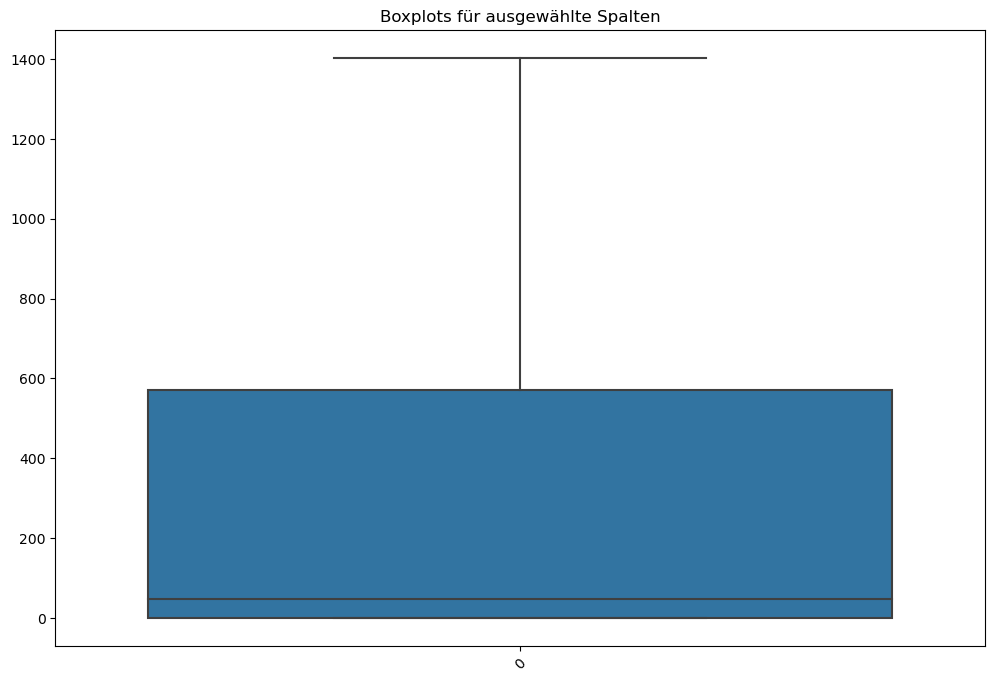

In [27]:
# Erstellung eines Subsets mit den gewünschten Columns
subset = df2["sunshine_min"]
# Boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=subset)
plt.xticks(rotation=45)  
plt.title("Boxplots für ausgewählte Spalten")
plt.show()


In [28]:
#Highest Sunshine Minutes
df2["sunshine_min"].nlargest(10)

459337    1402.0
459380    1402.0
462700    1402.0
462743    1402.0
144411    1302.0
144799    1302.0
147749    1302.0
148133    1302.0
350387    1302.0
151014    1202.0
Name: sunshine_min, dtype: float64

In [29]:
# Finde die Zeile mit dem höchsten Wert in der Spalte "sunshine_min"
max_sunshine_row = df2[df2["sunshine_min"] == df2["sunshine_min"].max()]
max_sunshine_row

#Syracuse im Staat New York hat mehrere Tage vorzuweisen in dem 24h die Sonne scheint 
#Google recherche - Es gibt in NY keine Tage wie in Skandinavien indem die Sonne durch scheint 
#Die Wetterstation ist am Airport - wurden die Sensoren geblendet? 
#Ich setzte Cap auf 1000 kmh um vermeintliche Fehler zu löschen

,date,average_temp_c,minimum_temp_c,maximum_temp_c,precipitation_mm,snow_mm,wind_direction_deg,windspeed_kmh,peak_wind_gust_kmh,air_pressure_hpa,sunshine_min,station_id,weather_station_name,states,latitude,longitude,year,month,weekday
459337,2001-09-27,11.7,8.3,15.0,0.8,0.0,NaN,8.6,NaN,1011.6,1402.0,72519,Syracuse Hancock International Airport,New York,43.1167,-76.1,2001,9,3
459380,2001-11-07,6.7,0.6,12.8,0.0,0.0,NaN,10.8,NaN,1019.4,1402.0,72519,Syracuse Hancock International Airport,New York,43.1167,-76.1,2001,11,2
462700,2001-09-27,11.7,8.3,15.0,0.8,0.0,NaN,8.6,NaN,1011.6,1402.0,72519,Syracuse Hancock International Airport,New York,43.1167,-76.1,2001,9,3
462743,2001-11-07,6.7,0.6,12.8,0.0,0.0,NaN,10.8,NaN,1019.4,1402.0,72519,Syracuse Hancock International Airport,New York,43.1167,-76.1,2001,11,2


In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550413 entries, 0 to 550413
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   date                  550413 non-null  datetime64[ns]
 1   average_temp_c        474578 non-null  float64       
 2   minimum_temp_c        502235 non-null  float64       
 3   maximum_temp_c        502558 non-null  float64       
 4   precipitation_mm      442959 non-null  float64       
 5   snow_mm               322056 non-null  float64       
 6   wind_direction_deg    116759 non-null  float64       
 7   windspeed_kmh         479659 non-null  float64       
 8   peak_wind_gust_kmh    19844 non-null   float64       
 9   air_pressure_hpa      412135 non-null  float64       
 10  sunshine_min          96940 non-null   float64       
 11  station_id            550413 non-null  object        
 12  weather_station_name  550413 non-null  object        
 13 

In [74]:
# Drop windspeed kleiner als 1200 ohne Nullwerte zu berühren
df3 = df2[(df2["sunshine_min"] <= 1000.0) | (pd.isna(df2["sunshine_min"]))]
df3["sunshine_min"].nlargest(10)


281594    957.0
281590    943.0
281563    937.0
284480    936.0
281562    935.0
281613    935.0
284481    935.0
284483    935.0
284478    934.0
281561    933.0
Name: sunshine_min, dtype: float64

In [75]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550375 entries, 0 to 550413
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   date                  550375 non-null  datetime64[ns]
 1   average_temp_c        474542 non-null  float64       
 2   minimum_temp_c        502197 non-null  float64       
 3   maximum_temp_c        502520 non-null  float64       
 4   precipitation_mm      442921 non-null  float64       
 5   snow_mm               322018 non-null  float64       
 6   wind_direction_deg    116746 non-null  float64       
 7   windspeed_kmh         479621 non-null  float64       
 8   peak_wind_gust_kmh    19844 non-null   float64       
 9   air_pressure_hpa      412109 non-null  float64       
 10  sunshine_min          96902 non-null   float64       
 11  station_id            550375 non-null  object        
 12  weather_station_name  550375 non-null  object        
 13 

In [76]:
top_sunshine = df3.sort_values(by="sunshine_min", ascending=False).head()
top_sunshine

#Wir haben mögliche Datenfehler aus der Tabelle gelöscht (etwa 40 Werte vom Syracuse Airport)

,date,average_temp_c,minimum_temp_c,maximum_temp_c,precipitation_mm,snow_mm,wind_direction_deg,windspeed_kmh,peak_wind_gust_kmh,air_pressure_hpa,sunshine_min,station_id,weather_station_name,states,latitude,longitude,year,month,weekday
281594,1995-06-29,20.7,11.1,27.8,0.0,0.0,NaN,16.6,44.3,1021.2,957.0,72785,Spokane International Airport,Washington,47.6167,-117.5333,1995,6,3
281590,1995-06-25,21.2,13.9,28.3,0.0,0.0,214.0,16.6,33.5,1014.7,943.0,72785,Spokane International Airport,Washington,47.6167,-117.5333,1995,6,6
281563,1995-05-29,21.6,11.1,30.6,0.0,0.0,NaN,7.9,27.7,1014.7,937.0,72785,Spokane International Airport,Washington,47.6167,-117.5333,1995,5,0
284480,1995-06-19,27.2,20.0,32.8,0.0,0.0,200.0,12.2,25.9,1017.3,936.0,72658,Minneapolis-St Paul International,Minnesota,44.8667,-93.0500,1995,6,0
284481,1995-06-20,28.0,21.7,33.3,0.0,0.0,NaN,8.6,37.1,1015.2,935.0,72658,Minneapolis-St Paul International,Minnesota,44.8667,-93.0500,1995,6,1


In [34]:

df3["peak_wind_gust_kmh"].nlargest(10)

250150    226.8
250207    226.8
250373    212.4
250170    205.2
250255    205.2
250372    205.2
250320    201.6
250183    194.4
250221    194.4
250334    194.4
Name: peak_wind_gust_kmh, dtype: float64

In [77]:
# Durschnitts Temo
average_temp_by_year = df3.groupby("year")["average_temp_c"].mean().reset_index()
average_temp_by_year

,year,average_temp_c
0,1995,12.613030
1,1996,12.234330
2,1997,13.125087
3,1998,13.889036
4,1999,12.924299
5,2000,12.685612
6,2001,12.942950
7,2002,12.890665
8,2003,13.010348
9,2004,12.853608


In [36]:
# Gruppiere die Daten nach Jahr und Monat und berechne den Durchschnitt der 'average_temp_c' für jede Gruppe
average_temp_by_year_month = df3.groupby(["year", "month"])["average_temp_c"].mean().reset_index()

# Zeige die Ergebnisse an
print(average_temp_by_year_month)

     year  month  average_temp_c
0    1995      1        2.413669
1    1995      2        3.589694
2    1995      3        7.691499
3    1995      4       11.537173
4    1995      5       16.576156
..    ...    ...             ...
247  2015      8       22.866856
248  2015      9       19.824095
249  2015     10       14.233287
250  2015     11        7.889822
251  2015     12        5.361472

[252 rows x 3 columns]


/var/folders/td/x_4chtgd2350zf0kdhtw5vgc0000gn/T/ipykernel_34034/2845776259.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = average_temp_by_year_month.pivot('month', 'year', 'average_temp_c')


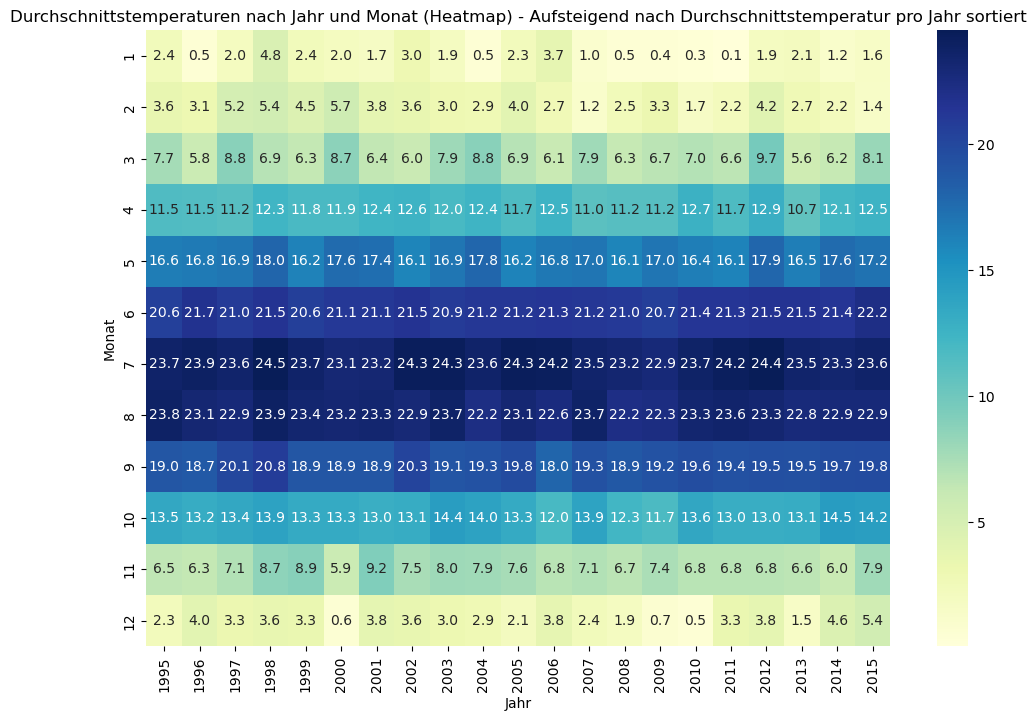

In [37]:
# Gruppiere die Daten nach Jahr und Monat und berechne den Durchschnitt der 'average_temp_c' für jede Gruppe
average_temp_by_year_month = df3.groupby(['year', 'month'])['average_temp_c'].mean().reset_index()

# Gruppiere die Daten nach Jahr und berechne den Durchschnitt der Durchschnittstemperaturen pro Jahr
average_temp_by_year = average_temp_by_year_month.groupby('year')['average_temp_c'].mean().reset_index()

# Sortiere die Daten nach Durchschnittstemperatur pro Jahr in aufsteigender Reihenfolge
average_temp_by_year = average_temp_by_year.sort_values(by='average_temp_c', ascending=True)

# Erstelle eine Pivot-Tabelle, um die Daten für die Heatmap vorzubereiten
heatmap_data = average_temp_by_year_month.pivot('month', 'year', 'average_temp_c')

# Größe des Heatmap-Plots festlegen
plt.figure(figsize=(12, 8))

# Heatmap erstellen
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu")

# Achsentitel hinzufügen
plt.xlabel('Jahr')
plt.ylabel('Monat')
plt.title('Durchschnittstemperaturen nach Jahr und Monat (Heatmap) - Aufsteigend nach Durchschnittstemperatur pro Jahr sortiert')

# Heatmap anzeigen
plt.show()


In [38]:
# Filtere das DataFrame für das Jahr XXXX                                           # Hier Jahr eingeben
average_temp_year = average_temp_by_year_month[average_temp_by_year_month["year"] == 1996]

# Zeige die Ergebnisse für das Jahr XXXX an
print(average_temp_year)


    year  month  average_temp_c
12  1996      1        0.486648
13  1996      2        3.118329
14  1996      3        5.815165
15  1996      4       11.502488
16  1996      5       16.750333
17  1996      6       21.691186
18  1996      7       23.946187
19  1996      8       23.145769
20  1996      9       18.739635
21  1996     10       13.156974
22  1996     11        6.283333
23  1996     12        4.006978


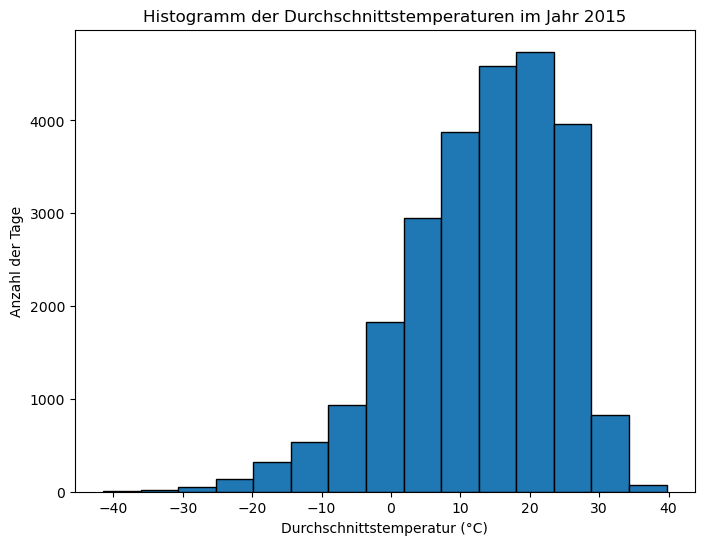

In [78]:
# Filtere das DataFrame für das Jahr 2015
df_2015 = df3[df3['year'] == 2015]

plt.figure(figsize=(8, 6))
plt.hist(df_2015['average_temp_c'], bins=15, edgecolor='black')
plt.xlabel('Durchschnittstemperatur (°C)')
plt.ylabel('Anzahl der Tage')
plt.title('Histogramm der Durchschnittstemperaturen im Jahr 2015')
plt.show()



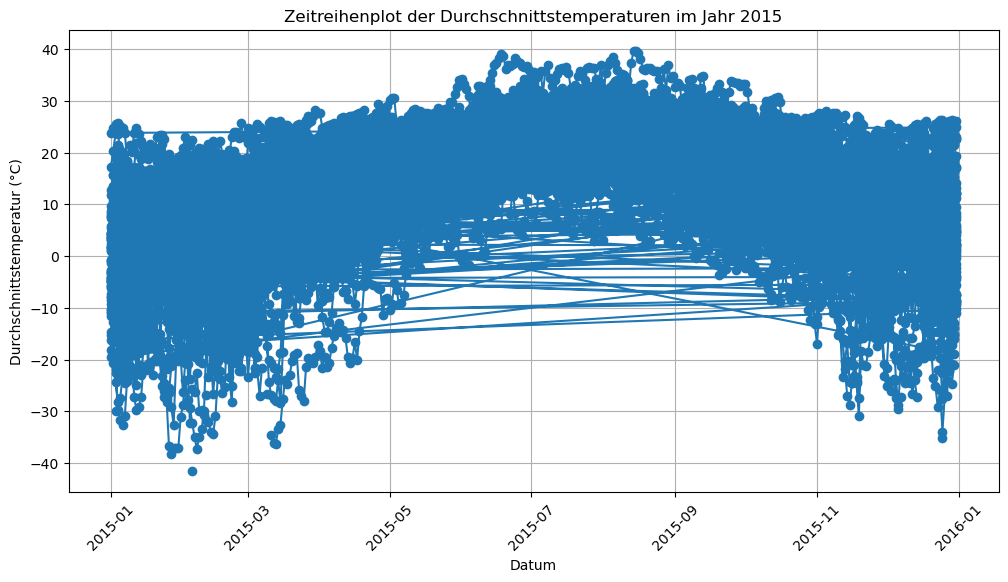

In [40]:
# Filtere das DataFrame für das Jahr 2015
df_2015 = df3[df3['year'] == 2015]

plt.figure(figsize=(12, 6))
plt.plot(df_2015['date'], df_2015['average_temp_c'], marker='o', linestyle='-')
plt.xlabel('Datum')
plt.ylabel('Durchschnittstemperatur (°C)')
plt.title('Zeitreihenplot der Durchschnittstemperaturen im Jahr 2015')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [41]:
#Check - Wieviele Daten pro Jahr

#                            Jahr eingeben
df_2015 = df3[df3['year'] == 2015]
# Ermittle die Anzahl der Datenpunkte für das Jahr 2015
anzahl_datenpunkte_2015 = df_2015.shape[0]
print(f"Anzahl der Datenpunkte im Jahr 2015: {anzahl_datenpunkte_2015}")

Anzahl der Datenpunkte im Jahr 2015: 25915


/var/folders/td/x_4chtgd2350zf0kdhtw5vgc0000gn/T/ipykernel_34034/1668132910.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['year'] = df3['date'].dt.year


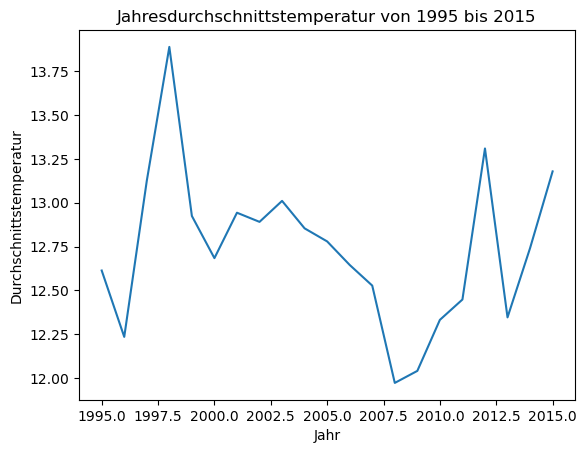

In [42]:
#Jahresdurschnitt 1995 - 2015
df3['year'] = df3['date'].dt.year
annual_avg_temp = df3.groupby('year')['average_temp_c'].mean()
plt.plot(annual_avg_temp.index, annual_avg_temp.values)
plt.xlabel('Jahr')
plt.ylabel('Durchschnittstemperatur')
plt.title('Jahresdurchschnittstemperatur von 1995 bis 2015')
plt.show()

# 1997 wärmstes Jahr im DS
# 2007 kältestes Jahr im DS

/var/folders/td/x_4chtgd2350zf0kdhtw5vgc0000gn/T/ipykernel_34034/3635620587.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['year'] = df3['date'].dt.year


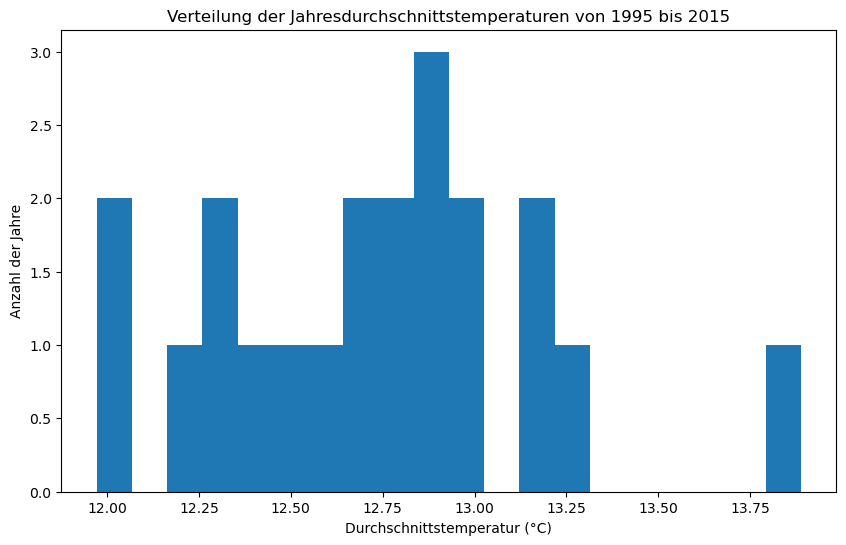

In [44]:
#Verteilung der Jahresdurchschnittstemp

df3['year'] = df3['date'].dt.year
annual_avg_temp = df3.groupby('year')['average_temp_c'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.hist(annual_avg_temp['average_temp_c'], bins=20)
plt.xlabel('Durchschnittstemperatur (°C)')
plt.ylabel('Anzahl der Jahre')
plt.title('Verteilung der Jahresdurchschnittstemperaturen von 1995 bis 2015')
plt.show()

#Größte Verteilung zwischen 12.10-13.00 Grad

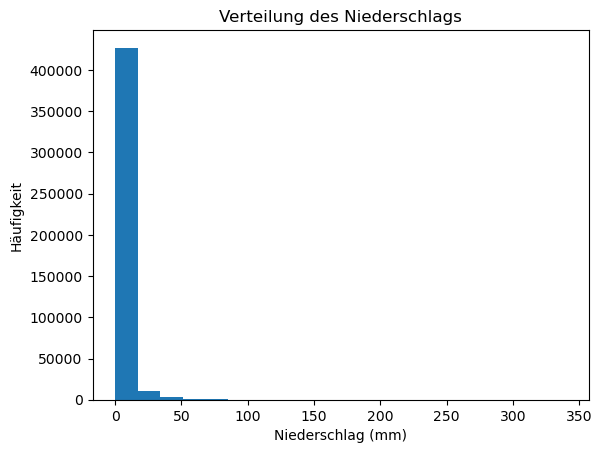

In [45]:
# Verteilung Regen im gesamten DF
plt.hist(df3['precipitation_mm'], bins=20)
plt.xlabel('Niederschlag (mm)')
plt.ylabel('Häufigkeit')
plt.title('Verteilung des Niederschlags')
plt.show()


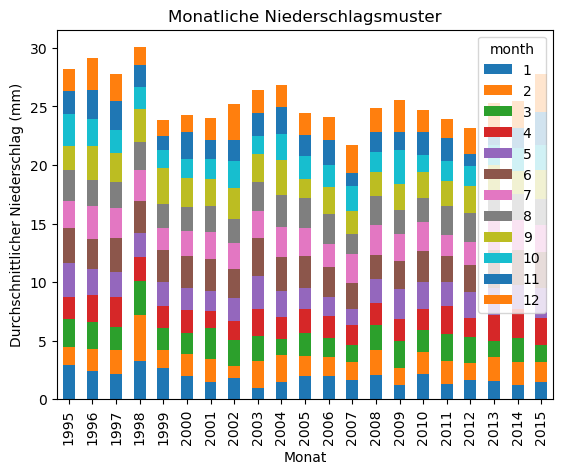

In [79]:
#Im welchen Jahr gab es den meisten Regen
monthly_avg_precip = df3.groupby(['year', 'month'])['precipitation_mm'].mean().unstack()
monthly_avg_precip.plot(kind='bar', stacked=True)
plt.xlabel('Monat')
plt.ylabel('Durchschnittlicher Niederschlag (mm)')
plt.title('Monatliche Niederschlagsmuster')
plt.show()


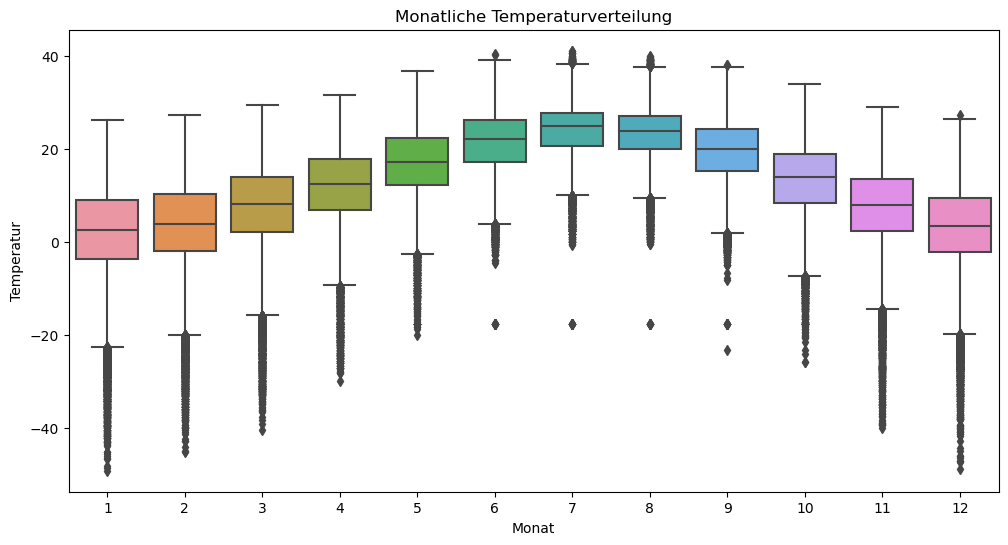

In [46]:
# Verteilung monatlicher Temp im gesamten DF
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='average_temp_c', data=df3)
plt.xlabel('Monat')
plt.ylabel('Temperatur')
plt.title('Monatliche Temperaturverteilung')
plt.show()


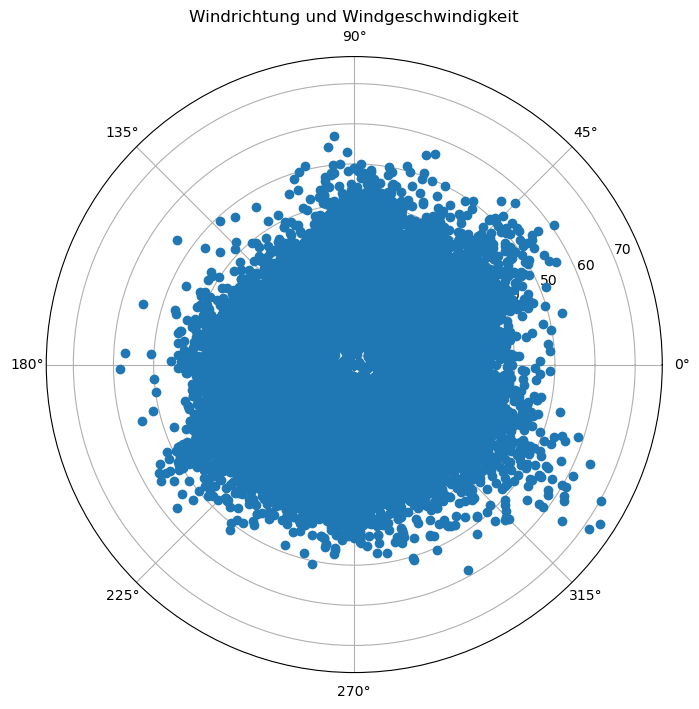

In [47]:
# Woher kommt der Wind
plt.figure(figsize=(8, 8))
plt.polar(df3['wind_direction_deg'] * (3.14159 / 180), df3['windspeed_kmh'], 'o')
plt.title('Windrichtung und Windgeschwindigkeit')
plt.show()


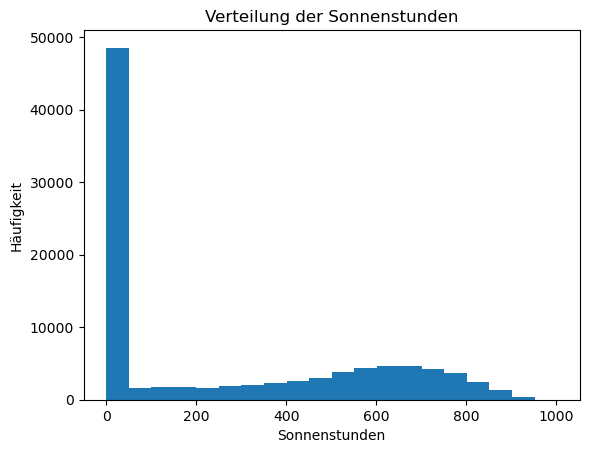

In [48]:
#Verteilung der Sonnenstunden
plt.hist(df3['sunshine_min'], bins=20)
plt.xlabel('Sonnenstunden')
plt.ylabel('Häufigkeit')
plt.title('Verteilung der Sonnenstunden')
plt.show()


In [50]:
extreme_wind_days = df3[df3['windspeed_kmh'] > 40]
extreme_rain_days = df3[df3['precipitation_mm'] > 50]
print(f"Anzahl der Tage mit extremen Winden: {len(extreme_wind_days)}")
print(f"Anzahl der Tage mit extremem Regen: {len(extreme_rain_days)}")


Anzahl der Tage mit extremen Winden: 1110
Anzahl der Tage mit extremem Regen: 1928


Für die gesamten US sind keine auffällige Pattern bzgl des Wetters über den Zeitraum zwischen 1995 bis 2015 zu beobachten.

Importiere Wildfire Daten aus SQL

In [51]:
schema = 'capstone_wildfire' 
wf_table_name = 'combined_weather_data_v4' 

In [52]:
# Get Data From SQL Database 

import pandas as pd
import sqlalchemy

# Verbindung zur Datenbank herstellen
engine = get_engine()

# SQL-Abfrage, um Daten aus der Tabelle zu laden
sql_query = "SELECT * FROM capstone_wildfire.fires_data_v1_rdy_to_clean_rows"

# Daten aus der Datenbank abrufen und in ein DataFrame laden
wf = pd.read_sql_query(sql_query, engine)

# DataFrame anzeigen
print(wf)


         unique_id source_reporting_unit_name gov_firecode  \
0          1370840          Tehama-Glenn Unit    undefined   
1          1370842          Tehama-Glenn Unit    undefined   
2          1370843          Tehama-Glenn Unit    undefined   
3          1370844          Tehama-Glenn Unit    undefined   
4          1370846          Tehama-Glenn Unit    undefined   
...            ...                        ...          ...   
1674433    1370833          Tehama-Glenn Unit    undefined   
1674434    1370834          Tehama-Glenn Unit    undefined   
1674435    1370835          Tehama-Glenn Unit    undefined   
1674436    1370836          Tehama-Glenn Unit    undefined   
1674437    1370839          Tehama-Glenn Unit    undefined   

                         fire_name  cause_code    cause_descr  fire_size  \
0        "BERREY,T"                          8       Children        1.5   
1        "WARREN,R"                          9  Miscellaneous        2.0   
2        REMUNDA           

In [53]:
wf

,unique_id,source_reporting_unit_name,gov_firecode,fire_name,cause_code,cause_descr,fire_size,fire_size_class,latitude,longitude,county,shape_hex,combined_control_date,combined_discovery_date,burning_time,state_name
0,1370840,Tehama-Glenn Unit,undefined,"""BERREY,T""",8,Children,1.5,B,40.281111,-122.340000,undefined,\x0001ad100000f4285c8fc2955ec008ffe772fb234440...,NaT,1999-08-16,NaN,California
1,1370842,Tehama-Glenn Unit,undefined,"""WARREN,R""",9,Miscellaneous,2.0,B,40.150000,-122.303889,undefined,\x0001ad100000f44d58ea72935ec03833333333134440...,NaT,2000-05-29,NaN,California
2,1370843,Tehama-Glenn Unit,undefined,REMUNDA,9,Miscellaneous,3.0,B,40.008889,-122.433056,undefined,\x0001ad1000007826a02eb79b5ec0f872544523014440...,NaT,2000-06-09,NaN,California
3,1370844,Tehama-Glenn Unit,undefined,"""EICHENSEE, H.""",9,Miscellaneous,2.0,B,39.921944,-122.395000,undefined,\x0001ad100000e07a14ae47995ec0c043814602f64340...,NaT,2000-06-20,NaN,California
4,1370846,Tehama-Glenn Unit,undefined,"""POCHOP,J""",9,Miscellaneous,0.3,B,40.106944,-122.190000,undefined,\x0001ad100000588fc2f5288c5ec00825fc5ab00d4440...,NaT,2000-07-02,NaN,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1674433,1370833,Tehama-Glenn Unit,undefined,KIMICK,8,Children,0.3,B,40.193056,-122.208056,undefined,\x0001ad10000014c039c8508d5ec0e0c7540bb6184440...,NaT,1996-07-17,NaN,California
1674434,1370834,Tehama-Glenn Unit,undefined,LOLETA,8,Children,1.0,B,39.921944,-122.316111,undefined,\x0001ad10000088d6172a3b945ec0c043814602f64340...,NaT,1996-08-26,NaN,California
1674435,1370835,Tehama-Glenn Unit,undefined,SPRR,8,Children,0.1,A,40.266111,-122.301111,undefined,\x0001ad100000607a886745935ec0b846c9ed0f224440...,NaT,1997-04-12,NaN,California
1674436,1370836,Tehama-Glenn Unit,undefined,COSTA,8,Children,0.1,A,40.368056,-122.226111,undefined,\x0001ad10000094adbb9a788e5ec0482ebb711c2f4440...,NaT,1997-06-01,NaN,California


In [54]:
print(wf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1674438 entries, 0 to 1674437
Data columns (total 16 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   unique_id                   1674438 non-null  int64         
 1   source_reporting_unit_name  1674438 non-null  object        
 2   gov_firecode                1674438 non-null  object        
 3   fire_name                   1674438 non-null  object        
 4   cause_code                  1674438 non-null  int64         
 5   cause_descr                 1674438 non-null  object        
 6   fire_size                   1674438 non-null  float64       
 7   fire_size_class             1674438 non-null  object        
 8   latitude                    1674438 non-null  float64       
 9   longitude                   1674438 non-null  float64       
 10  county                      1674438 non-null  object        
 11  shape_hex               

In [55]:
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550396 entries, 0 to 550413
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   date                  550396 non-null  datetime64[ns]
 1   average_temp_c        474561 non-null  float64       
 2   minimum_temp_c        502218 non-null  float64       
 3   maximum_temp_c        502541 non-null  float64       
 4   precipitation_mm      442942 non-null  float64       
 5   snow_mm               322039 non-null  float64       
 6   wind_direction_deg    116755 non-null  float64       
 7   windspeed_kmh         479642 non-null  float64       
 8   peak_wind_gust_kmh    19844 non-null   float64       
 9   air_pressure_hpa      412122 non-null  float64       
 10  sunshine_min          96923 non-null   float64       
 11  station_id            550396 non-null  object        
 12  weather_station_name  550396 non-null  object        
 13 

In [56]:
# extract year, month, dayofweek information out of column date and build new column for each - combined_control_date 
wf["c_year"]=wf["combined_control_date"].dt.year
wf["c_month"]=wf["combined_control_date"].dt.month
wf["c_weekday"]=wf["combined_control_date"].dt.dayofweek


In [57]:
# extract year, month, dayofweek information out of column date and build new column for each - combined_control_date 
wf["d_year"]=wf["combined_discovery_date"].dt.year
wf["d_month"]=wf["combined_discovery_date"].dt.month
wf["d_weekday"]=wf["combined_discovery_date"].dt.dayofweek


In [58]:
wf.head()

,unique_id,source_reporting_unit_name,gov_firecode,fire_name,cause_code,cause_descr,fire_size,fire_size_class,latitude,longitude,...,combined_control_date,combined_discovery_date,burning_time,state_name,c_year,c_month,c_weekday,d_year,d_month,d_weekday
0,1370840,Tehama-Glenn Unit,undefined,"""BERREY,T""",8,Children,1.5,B,40.281111,-122.340000,...,NaT,1999-08-16,NaN,California,NaN,NaN,NaN,1999,8,0
1,1370842,Tehama-Glenn Unit,undefined,"""WARREN,R""",9,Miscellaneous,2.0,B,40.150000,-122.303889,...,NaT,2000-05-29,NaN,California,NaN,NaN,NaN,2000,5,0
2,1370843,Tehama-Glenn Unit,undefined,REMUNDA,9,Miscellaneous,3.0,B,40.008889,-122.433056,...,NaT,2000-06-09,NaN,California,NaN,NaN,NaN,2000,6,4
3,1370844,Tehama-Glenn Unit,undefined,"""EICHENSEE, H.""",9,Miscellaneous,2.0,B,39.921944,-122.395000,...,NaT,2000-06-20,NaN,California,NaN,NaN,NaN,2000,6,1
4,1370846,Tehama-Glenn Unit,undefined,"""POCHOP,J""",9,Miscellaneous,0.3,B,40.106944,-122.190000,...,NaT,2000-07-02,NaN,California,NaN,NaN,NaN,2000,7,6


In [59]:
# Speichern der DF über Restart-Ladezeiten zu vermeiden
df3.to_csv('df3_data.csv', index=False)
wf.to_csv('wf_data.csv', index=False)
